# IMPORT REQUIRED LIBRARIES

In [133]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import train-test split 
from sklearn.model_selection import train_test_split

# import function to perform linear regression using OLS
import statsmodels.api as sm

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import function to perform linear regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import ElasticNet
plt.rcParams['figure.figsize']=[15,8]

In [136]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
# import the XGBoost function for classification
#from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV


In [3]:
df1=pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [4]:
df1['Diabetes_binary'].value_counts()

0.000000    35346
1.000000    35346
Name: Diabetes_binary, dtype: int64

In [5]:
df1.shape

(70692, 22)

In [6]:
df1.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.000000,1.000000,0.000000,1.000000,26.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,5.000000,30.000000,0.000000,1.000000,4.000000,6.000000,8.000000
1,0.000000,1.000000,1.000000,1.000000,26.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,12.000000,6.000000,8.000000
2,0.000000,0.000000,0.000000,1.000000,26.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,10.000000,0.000000,1.000000,13.000000,6.000000,8.000000
3,0.000000,1.000000,1.000000,1.000000,28.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,3.000000,0.000000,1.000000,11.000000,6.000000,8.000000
4,0.000000,0.000000,0.000000,1.000000,29.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,8.000000


In [7]:
df1.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,0.788774,0.042721,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,0.408181,0.202228,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [8]:
df2=pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

In [9]:
df2.shape

(253680, 22)

In [10]:
df2['Diabetes_binary'].value_counts()

0.000000    218334
1.000000     35346
Name: Diabetes_binary, dtype: int64

In [11]:
df2.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [12]:
df2.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.000000,1.000000,1.000000,1.000000,40.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,5.000000,18.000000,15.000000,1.000000,0.000000,9.000000,4.000000,3.000000
1,0.000000,0.000000,0.000000,0.000000,25.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,7.000000,6.000000,1.000000
2,0.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,0.000000,9.000000,4.000000,8.000000
3,0.000000,1.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,11.000000,3.000000,6.000000
4,0.000000,1.000000,1.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,11.000000,5.000000,4.000000


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [15]:
df3=pd.concat([df1,df2],axis=0)

In [16]:
df3.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.000000,1.000000,0.000000,1.000000,26.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,5.000000,30.000000,0.000000,1.000000,4.000000,6.000000,8.000000
1,0.000000,1.000000,1.000000,1.000000,26.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,12.000000,6.000000,8.000000
2,0.000000,0.000000,0.000000,1.000000,26.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,10.000000,0.000000,1.000000,13.000000,6.000000,8.000000
3,0.000000,1.000000,1.000000,1.000000,28.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,3.000000,0.000000,1.000000,11.000000,6.000000,8.000000
4,0.000000,0.000000,0.000000,1.000000,29.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,8.000000


In [17]:
df3.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,324372.000000,324372.000000,324372.000000,324372.000000,324372.000000,324372.000000,324372.000000,324372.000000,324372.000000,324372.000000,324372.000000,324372.000000,324372.000000,324372.000000,324372.000000,324372.000000,324372.000000,324372.000000,324372.000000,324372.000000,324372.000000,324372.000000
mean,0.217935,0.458304,0.446259,0.965413,28.703735,0.450165,0.045278,0.105872,0.744882,0.629361,0.806485,0.053260,0.951904,0.086299,2.582371,3.308399,4.583876,0.186641,0.443972,8.152405,5.022215,5.976385
std,0.412844,0.498259,0.497104,0.182731,6.749545,0.497511,0.207914,0.307675,0.435928,0.482977,0.395054,0.224552,0.213969,0.280806,1.086812,7.584533,9.051170,0.389623,0.496852,3.019943,0.996806,2.099399
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [18]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324372 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       324372 non-null  float64
 1   HighBP                324372 non-null  float64
 2   HighChol              324372 non-null  float64
 3   CholCheck             324372 non-null  float64
 4   BMI                   324372 non-null  float64
 5   Smoker                324372 non-null  float64
 6   Stroke                324372 non-null  float64
 7   HeartDiseaseorAttack  324372 non-null  float64
 8   PhysActivity          324372 non-null  float64
 9   Fruits                324372 non-null  float64
 10  Veggies               324372 non-null  float64
 11  HvyAlcoholConsump     324372 non-null  float64
 12  AnyHealthcare         324372 non-null  float64
 13  NoDocbcCost           324372 non-null  float64
 14  GenHlth               324372 non-null  float64
 15  

# CHANGE THE DTYPE AS PER DATA DEFINATION

In [19]:
#df.columns

In [20]:
df=df3.copy()
df['HighBP']=df['HighBP'].astype(object)
df['HighChol']=df['HighChol'].astype(object)
df['CholCheck']=df['CholCheck'].astype(object)
df['Smoker']=df['Smoker'].astype(object)
df['Stroke']=df['Stroke'].astype(object)
df['HeartDiseaseorAttack']=df['HeartDiseaseorAttack'].astype(object)
df['PhysActivity']=df['PhysActivity'].astype(object)
df['Fruits']=df['Fruits'].astype(object)
df['Veggies']=df['Veggies'].astype(object)
df['HvyAlcoholConsump']=df['HvyAlcoholConsump'].astype(object)
df['AnyHealthcare']=df['AnyHealthcare'].astype(object)
df['NoDocbcCost']=df['NoDocbcCost'].astype(object)
df['GenHlth']=df['GenHlth'].astype(object)
df['DiffWalk']=df['DiffWalk'].astype(object)
df['Sex']=df['Sex'].astype(object)
df['Education']=df['Education'].astype(object)


In [21]:
df3.shape

(324372, 22)

check dtype

In [22]:
df.dtypes

Diabetes_binary         float64
HighBP                   object
HighChol                 object
CholCheck                object
BMI                     float64
Smoker                   object
Stroke                   object
HeartDiseaseorAttack     object
PhysActivity             object
Fruits                   object
Veggies                  object
HvyAlcoholConsump        object
AnyHealthcare            object
NoDocbcCost              object
GenHlth                  object
MentHlth                float64
PhysHlth                float64
DiffWalk                 object
Sex                      object
Age                     float64
Education                object
Income                  float64
dtype: object

# REMOVE INSIGNIFICANT VARIABLES

In [23]:
df=df.drop(['Education','Income'],axis=1)

In [24]:
df.shape

(324372, 20)

# MISSING VALUE TREATMENT

In [25]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
dtype: int64

we have no null values in the data.

# DUMMY ENCODE CATEGORICAL VARIABLES

In [26]:
df_feature=df.drop('Diabetes_binary',axis=1)
df_target=df['Diabetes_binary']

In [27]:
df_cat=df.select_dtypes(np.object)
df_cat=pd.get_dummies(df_cat,drop_first=True)

In [28]:
df_num=df_feature.select_dtypes(np.number)

In [29]:
df_num.columns

Index(['BMI', 'MentHlth', 'PhysHlth', 'Age'], dtype='object')

In [30]:
df_cat.columns

Index(['HighBP_1.0', 'HighChol_1.0', 'CholCheck_1.0', 'Smoker_1.0',
       'Stroke_1.0', 'HeartDiseaseorAttack_1.0', 'PhysActivity_1.0',
       'Fruits_1.0', 'Veggies_1.0', 'HvyAlcoholConsump_1.0',
       'AnyHealthcare_1.0', 'NoDocbcCost_1.0', 'GenHlth_2.0', 'GenHlth_3.0',
       'GenHlth_4.0', 'GenHlth_5.0', 'DiffWalk_1.0', 'Sex_1.0'],
      dtype='object')

In [31]:
x=pd.concat([df_num,df_cat],axis=1)
x.head()

,BMI,MentHlth,PhysHlth,Age,HighBP_1.0,HighChol_1.0,CholCheck_1.0,Smoker_1.0,Stroke_1.0,HeartDiseaseorAttack_1.0,PhysActivity_1.0,Fruits_1.0,Veggies_1.0,HvyAlcoholConsump_1.0,AnyHealthcare_1.0,NoDocbcCost_1.0,GenHlth_2.0,GenHlth_3.0,GenHlth_4.0,GenHlth_5.0,DiffWalk_1.0,Sex_1.0
0,26.000000,5.000000,30.000000,4.000000,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1
1,26.000000,0.000000,0.000000,12.000000,1,1,1,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1
2,26.000000,0.000000,10.000000,13.000000,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,0,0,1
3,28.000000,0.000000,3.000000,11.000000,1,1,1,1,0,0,1,1,1,0,1,0,0,1,0,0,0,1
4,29.000000,0.000000,0.000000,8.000000,0,0,1,1,0,0,1,1,1,0,1,0,1,0,0,0,0,0


In [32]:
df_cat.columns

Index(['HighBP_1.0', 'HighChol_1.0', 'CholCheck_1.0', 'Smoker_1.0',
       'Stroke_1.0', 'HeartDiseaseorAttack_1.0', 'PhysActivity_1.0',
       'Fruits_1.0', 'Veggies_1.0', 'HvyAlcoholConsump_1.0',
       'AnyHealthcare_1.0', 'NoDocbcCost_1.0', 'GenHlth_2.0', 'GenHlth_3.0',
       'GenHlth_4.0', 'GenHlth_5.0', 'DiffWalk_1.0', 'Sex_1.0'],
      dtype='object')

# Outliers

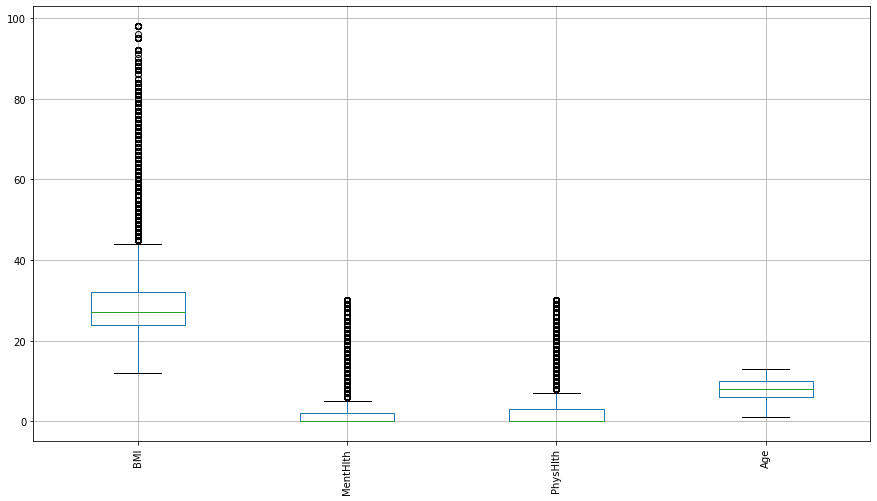

In [33]:
plt.figure(figsize=(15,8))
df_num.boxplot()
plt.xticks(rotation='vertical')
plt.show()

In [34]:
# Dealing with Outliers

In [35]:
q1=df_num.quantile(0.25)
q3=df_num.quantile(0.75)
iqr=q3-q1
df_without_outliers=df_num[~((df_num<q1-1.5*(iqr))|(df_num>q3+1.5*(iqr))).any(axis=1)]

In [36]:
print('original shape:',df_num.shape)
print('shape without outliers',df_without_outliers.shape)

original shape: (324372, 4)
shape without outliers (237507, 4)


In [37]:
lost_data=((df_num.shape[0]-df_without_outliers.shape[0])/df_num.shape[0])*100
lost_data

26.779438422551884

As lot of data is getting lost so we will not remove outliers from our dataset , to prevent the data accuracy.

# Distribution of Variables.

 Distribution of numeric Independent variables 

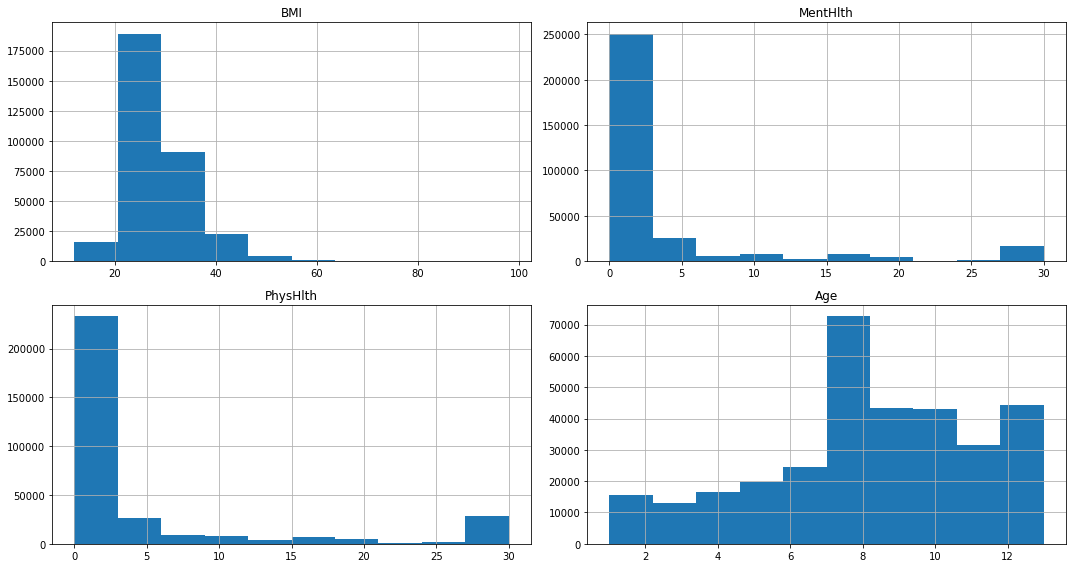

Skewness : 


BMI         2.014478
MentHlth    2.641638
PhysHlth    2.066629
Age        -0.403026
dtype: float64

In [38]:
df_num.hist()
plt.tight_layout()
plt.show()

print('Skewness : ' )
df_num.skew()

<AxesSubplot:xlabel='BMI', ylabel='Density'>

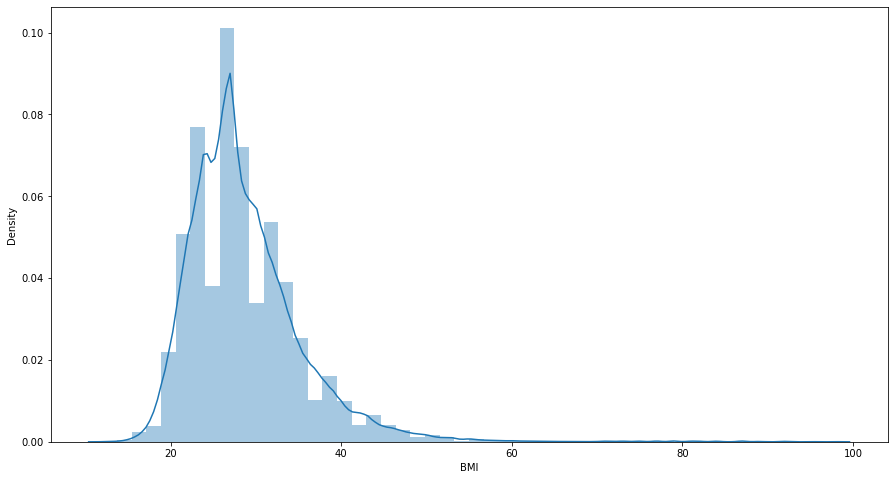

In [39]:
sns.distplot(df_num['BMI'])

<AxesSubplot:xlabel='BMI', ylabel='Density'>

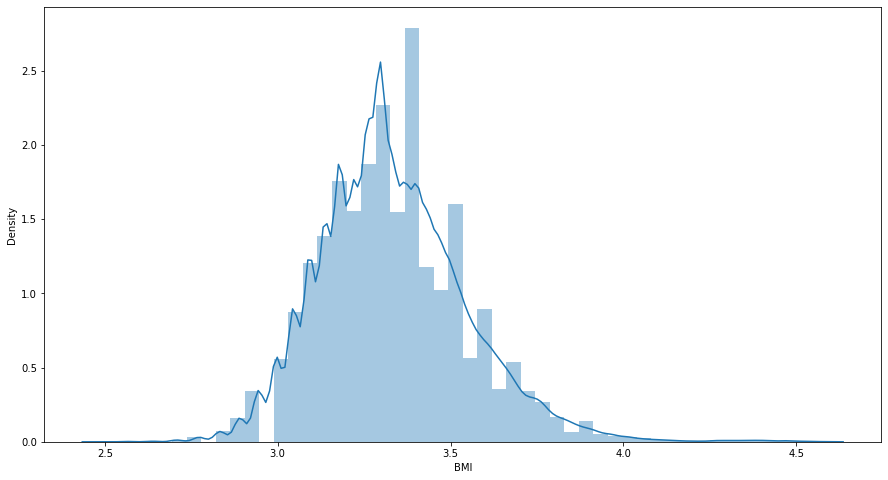

In [40]:
sns.distplot(np.log(df_num['BMI']))

In [41]:
(np.log(df_num['BMI'])).skew()

0.6561203888496918

In [42]:
from scipy import stats as st

<AxesSubplot:xlabel='MentHlth', ylabel='Density'>

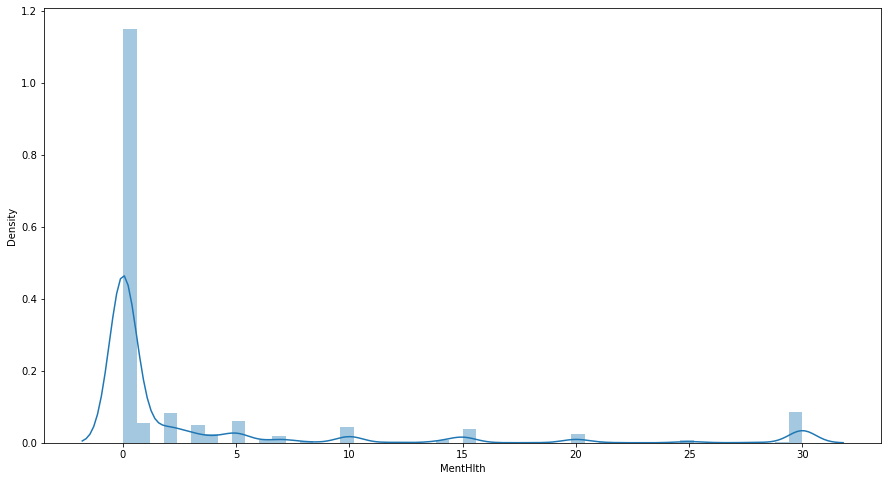

In [43]:
sns.distplot(df_num['MentHlth'])

<AxesSubplot:xlabel='MentHlth', ylabel='Density'>

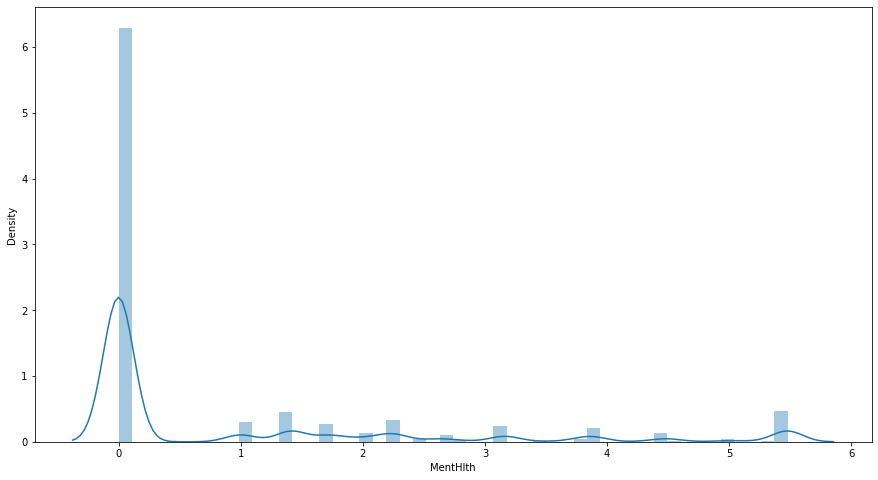

In [44]:
sns.distplot(np.sqrt(df_num['MentHlth']))

In [45]:
(np.sqrt(df_num['MentHlth'])).skew()

1.7475833134854213

<AxesSubplot:xlabel='PhysHlth', ylabel='Density'>

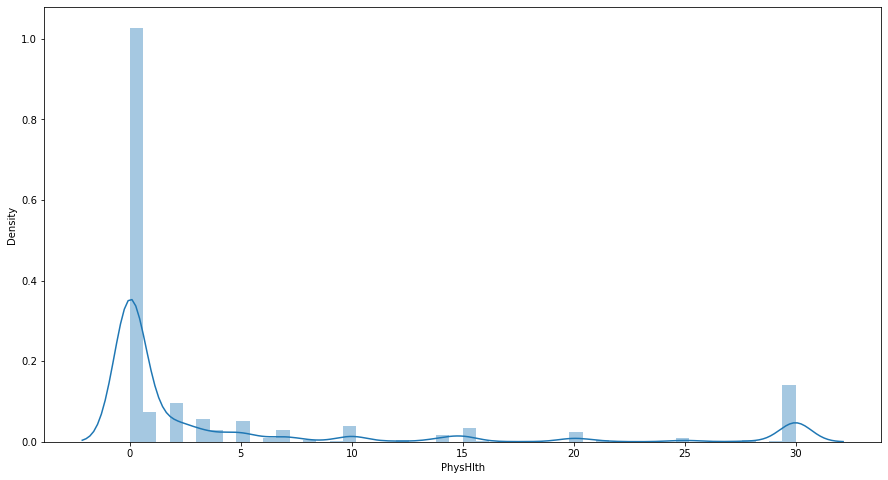

In [46]:
sns.distplot(df_num['PhysHlth'])

<AxesSubplot:xlabel='PhysHlth', ylabel='Density'>

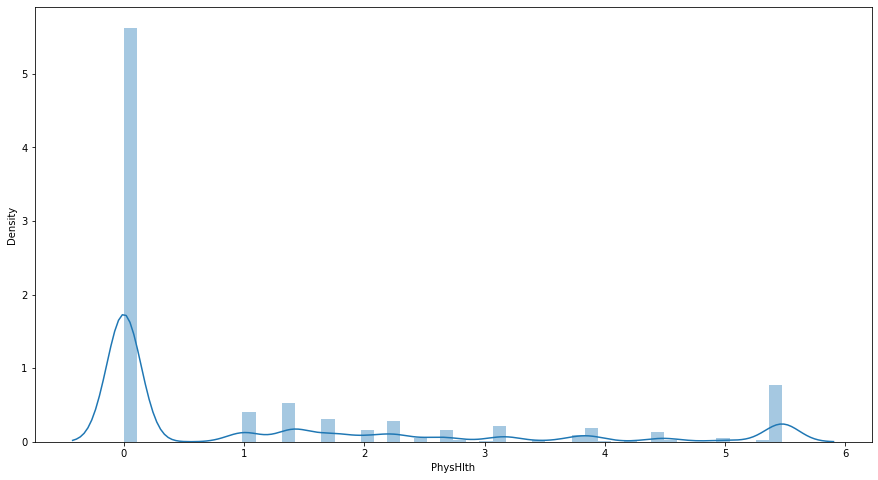

In [47]:
sns.distplot(np.sqrt(df_num['PhysHlth']))

In [48]:
(np.sqrt(df_num['PhysHlth'])).skew()

1.3904035958789915

In [49]:
df_num['BMI']=(np.log(df_num['BMI']))
df_num['MentHlth']=(np.sqrt(df_num['MentHlth']))
df_num['PhysHlth']=(np.sqrt(df_num['PhysHlth']))

In [50]:
df_num.skew()

BMI         0.656120
MentHlth    1.747583
PhysHlth    1.390404
Age        -0.403026
dtype: float64

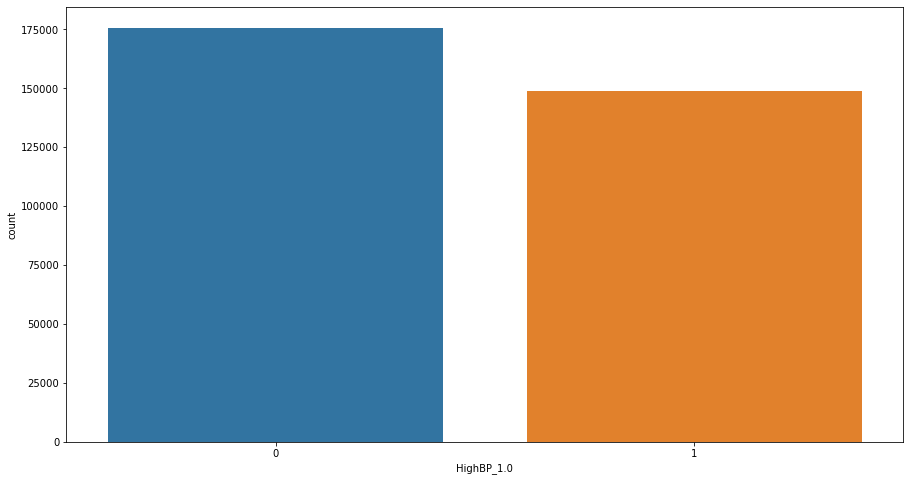

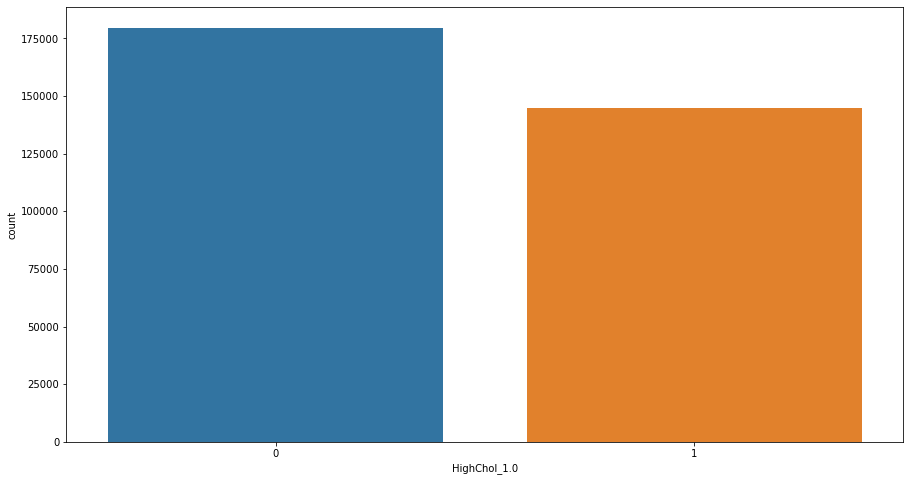

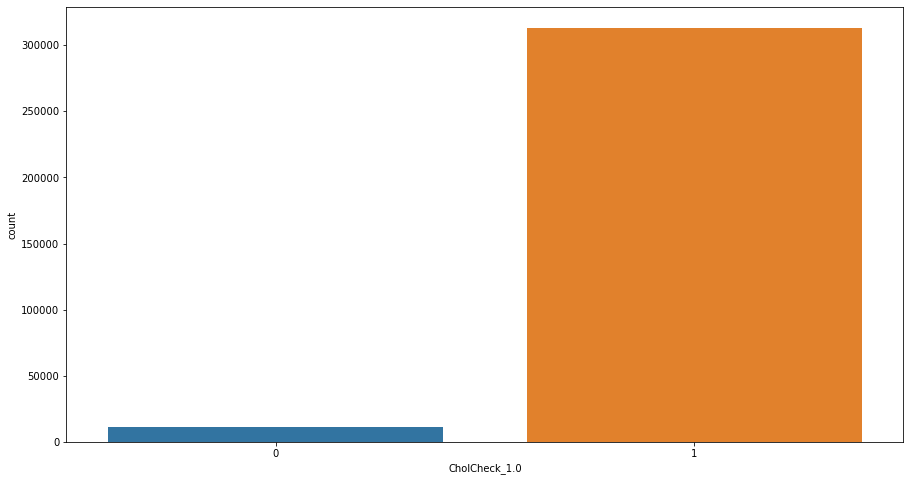

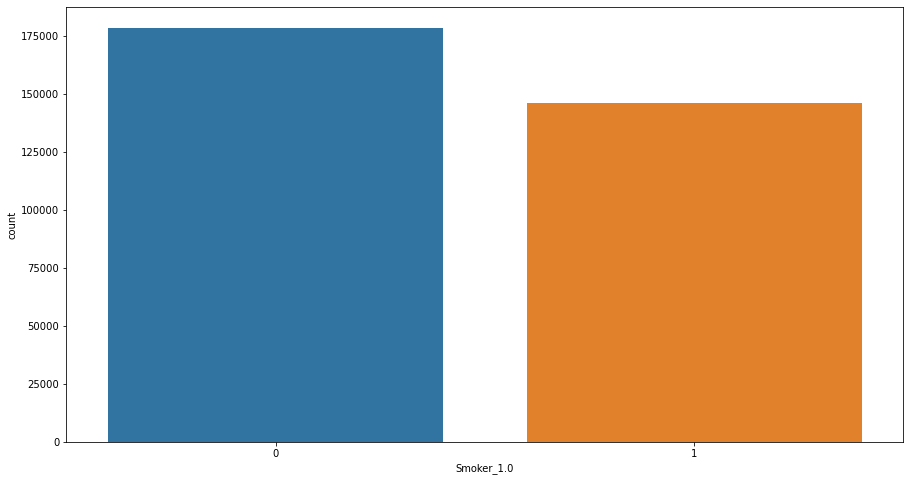

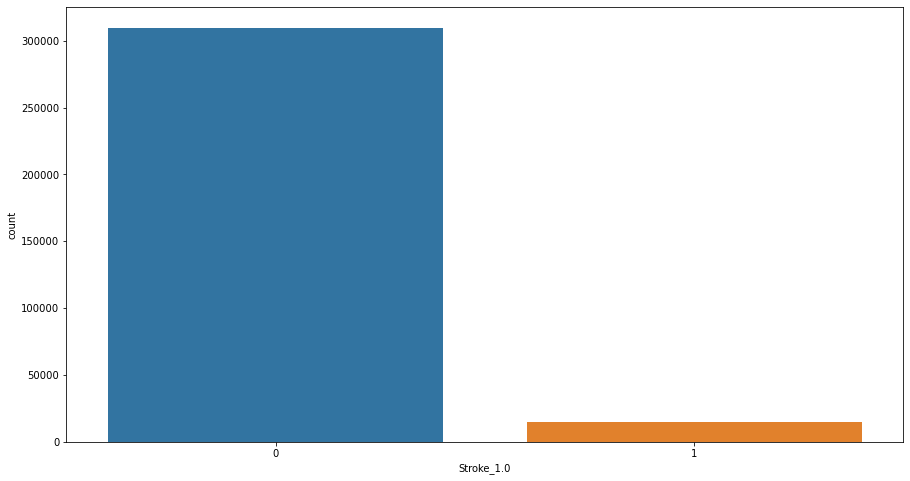

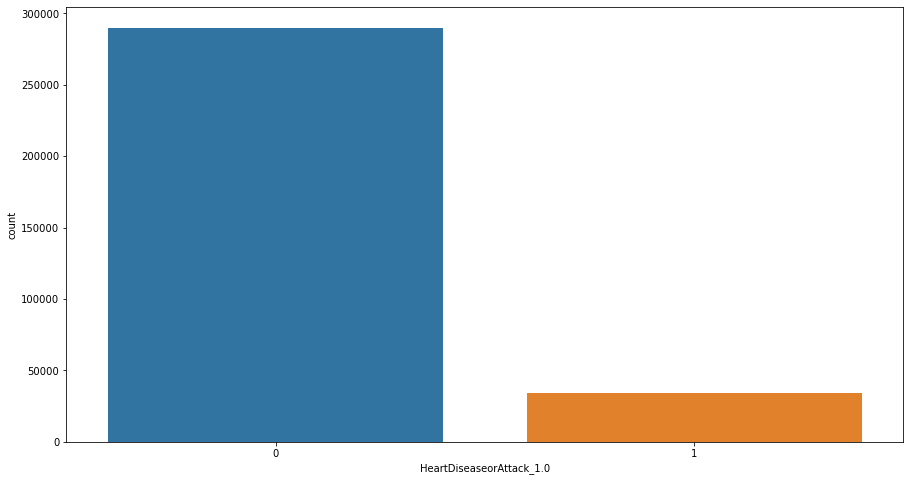

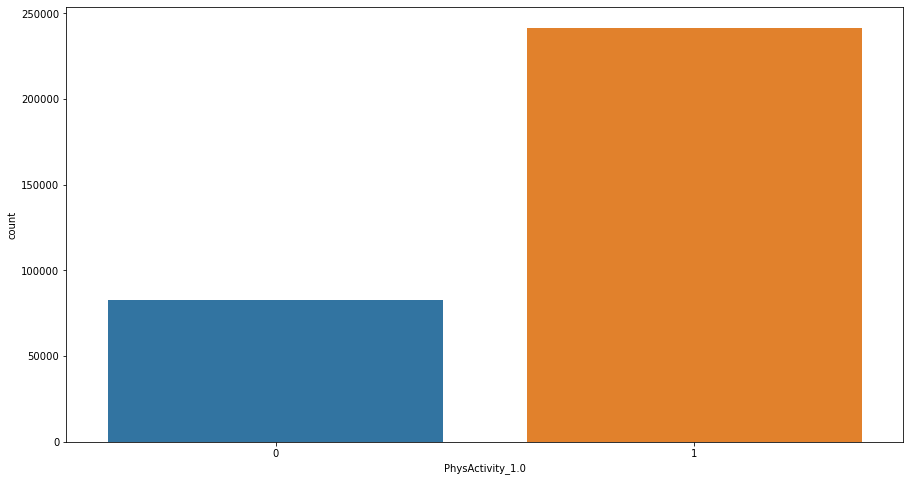

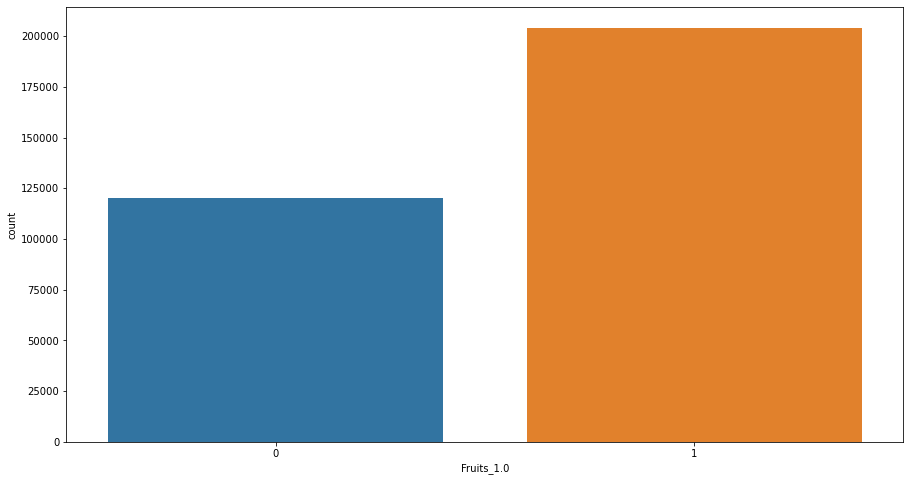

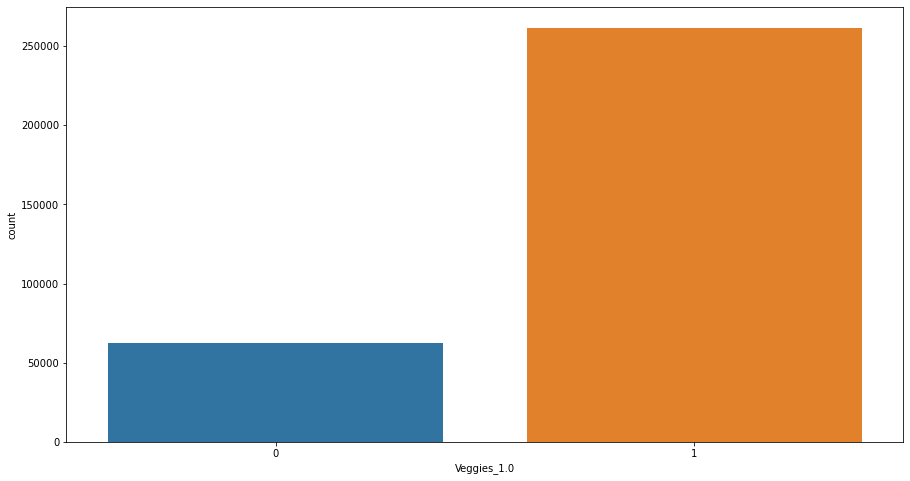

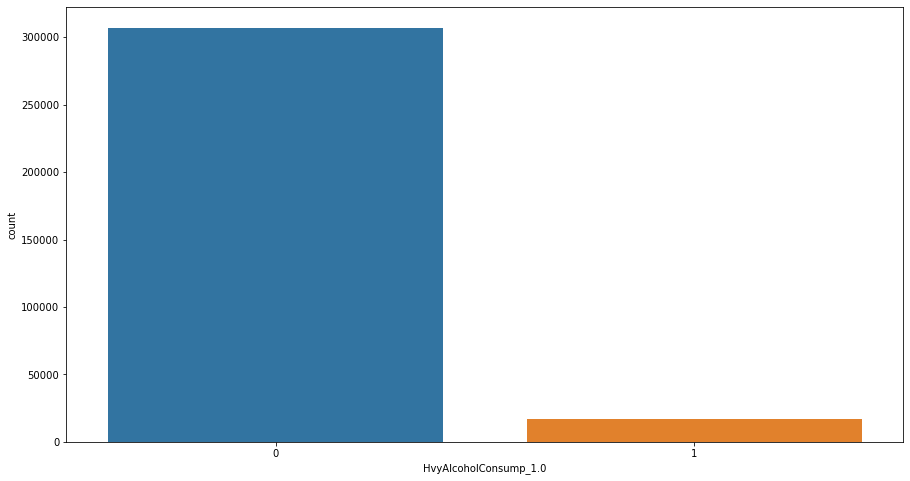

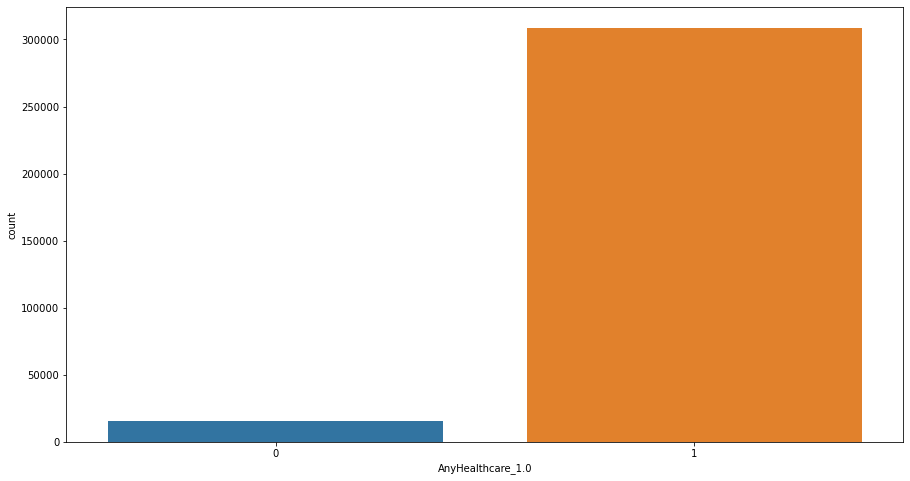

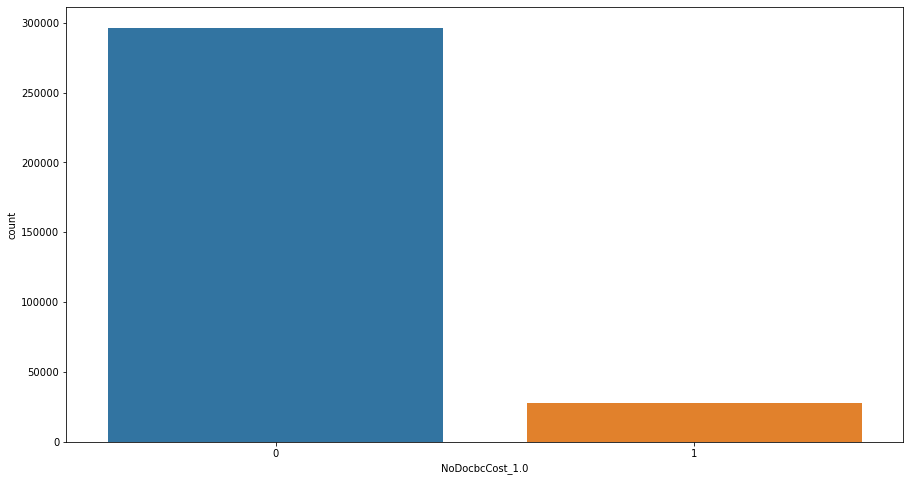

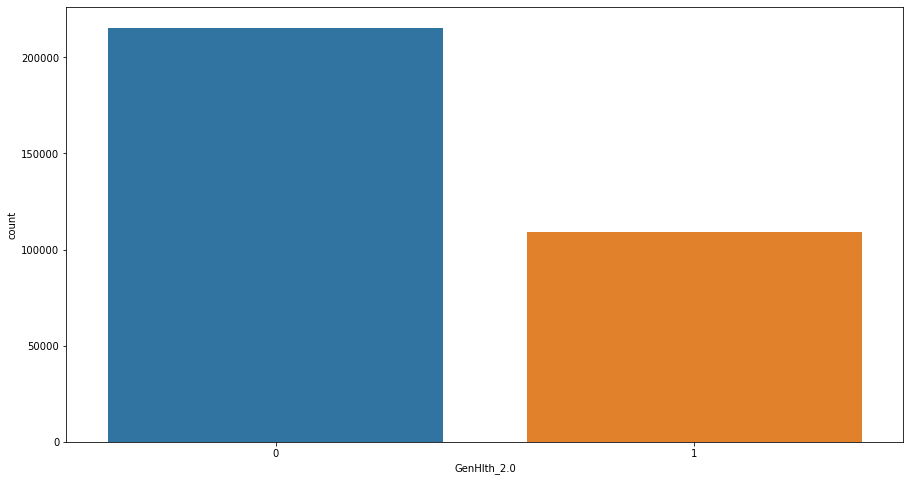

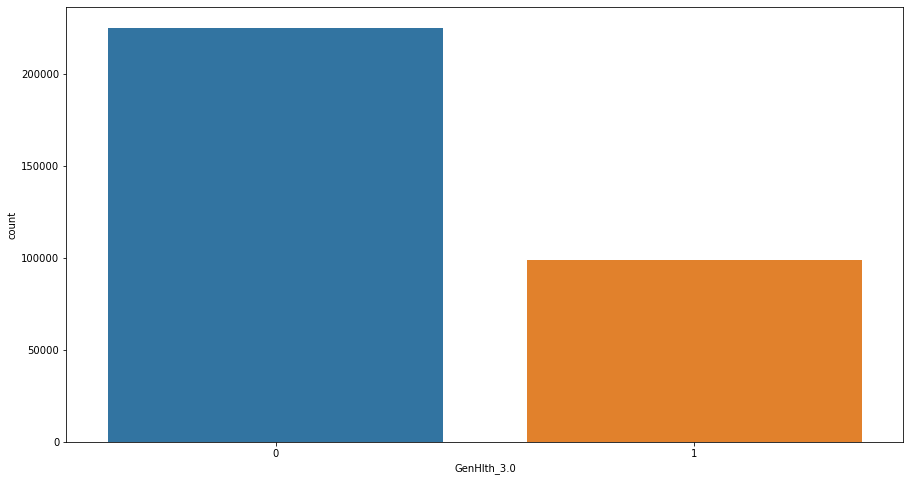

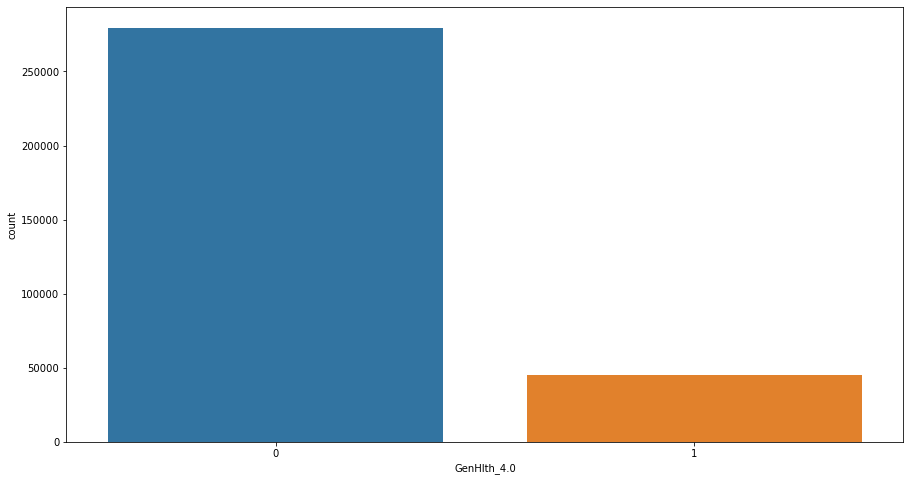

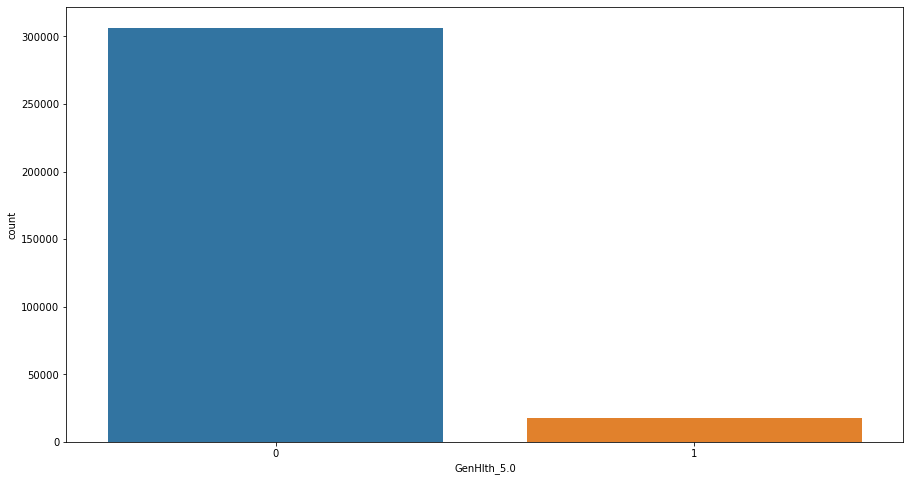

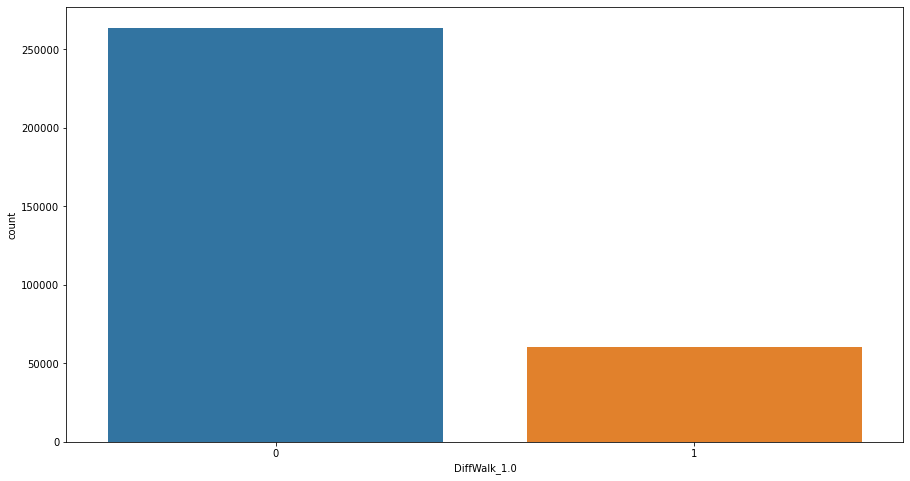

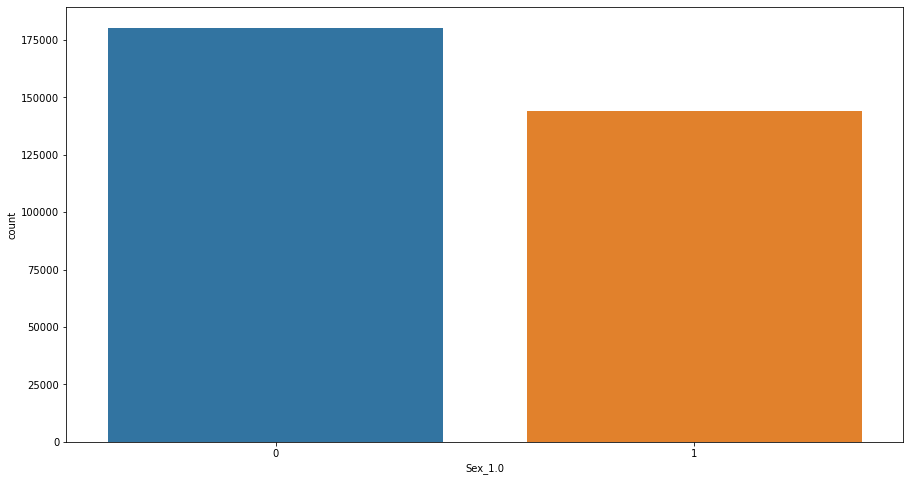

In [51]:
for i in df_cat:
    sns.countplot(df_cat[i])
    plt.show()

Distribution of dependent categorical Variable.

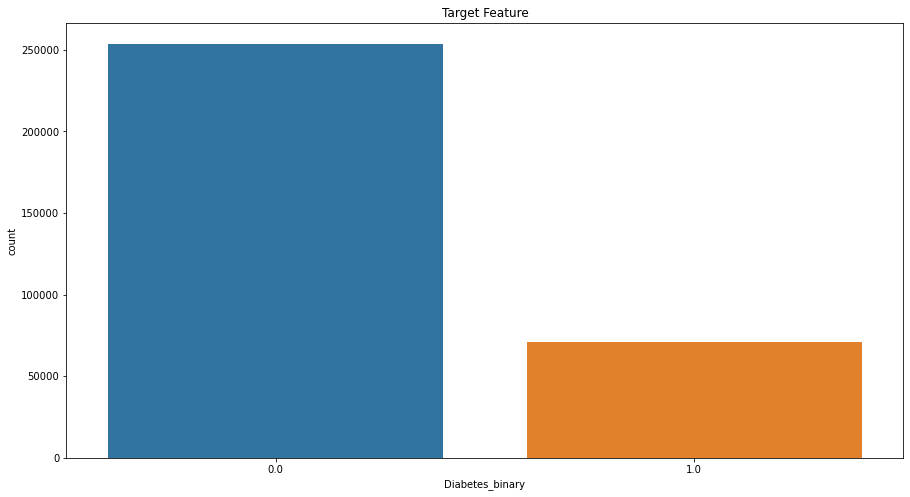

In [52]:
sns.countplot(df['Diabetes_binary'])
plt.title('Target Feature')
plt.show()

In [53]:
df_num.columns

Index(['BMI', 'MentHlth', 'PhysHlth', 'Age'], dtype='object')

# Scale The Data

In [54]:
sc=StandardScaler()
x=sc.fit_transform(df_num)
scaled_num=pd.DataFrame(x,columns=df_num.columns)
df_target=df['Diabetes_binary']
scaled_target=(df_target-df_target.mean())/df_target.std()

In [55]:
scaled_num.head()

,BMI,MentHlth,PhysHlth,Age
0,-0.353641,0.847551,2.400765,-1.374997
1,-0.353641,-0.563614,-0.648902,1.274064
2,-0.353641,-0.563614,1.111825,1.605197
3,-0.004927,-0.563614,0.315488,0.942931
4,0.160194,-0.563614,-0.648902,-0.050466


In [56]:
df_num.head()

,BMI,MentHlth,PhysHlth,Age
0,3.258097,2.236068,5.477226,4.000000
1,3.258097,0.000000,0.000000,12.000000
2,3.258097,0.000000,3.162278,13.000000
3,3.332205,0.000000,1.732051,11.000000
4,3.367296,0.000000,0.000000,8.000000


In [57]:
df_cat.head()

,HighBP_1.0,HighChol_1.0,CholCheck_1.0,Smoker_1.0,Stroke_1.0,HeartDiseaseorAttack_1.0,PhysActivity_1.0,Fruits_1.0,Veggies_1.0,HvyAlcoholConsump_1.0,AnyHealthcare_1.0,NoDocbcCost_1.0,GenHlth_2.0,GenHlth_3.0,GenHlth_4.0,GenHlth_5.0,DiffWalk_1.0,Sex_1.0
0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1
1,1,1,1,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1
2,0,0,1,0,0,0,1,1,1,0,1,0,0,0,0,0,0,1
3,1,1,1,1,0,0,1,1,1,0,1,0,0,1,0,0,0,1
4,0,0,1,1,0,0,1,1,1,0,1,0,1,0,0,0,0,0


In [58]:
#pd.concat(scaled_num,df_cat)

In [59]:
scaled_num=scaled_num.loc[~scaled_num.index.duplicated(keep='first')]
df_cat=df_cat.loc[~df_cat.index.duplicated(keep='first')]

In [60]:
df_independent=pd.concat([scaled_num,df_cat],axis=1)
df_independent.head()

,BMI,MentHlth,PhysHlth,Age,HighBP_1.0,HighChol_1.0,CholCheck_1.0,Smoker_1.0,Stroke_1.0,HeartDiseaseorAttack_1.0,PhysActivity_1.0,Fruits_1.0,Veggies_1.0,HvyAlcoholConsump_1.0,AnyHealthcare_1.0,NoDocbcCost_1.0,GenHlth_2.0,GenHlth_3.0,GenHlth_4.0,GenHlth_5.0,DiffWalk_1.0,Sex_1.0
0,-0.353641,0.847551,2.400765,-1.374997,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
1,-0.353641,-0.563614,-0.648902,1.274064,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
2,-0.353641,-0.563614,1.111825,1.605197,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
3,-0.004927,-0.563614,0.315488,0.942931,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
4,0.160194,-0.563614,-0.648902,-0.050466,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [61]:
df_independent.shape

(324372, 22)

In [62]:
df_target.shape

(324372,)

dfff=pd.concat([df_independent,df_target],axis=1)m

In [63]:
df_independent=df_independent.loc[~df_independent.index.duplicated(keep='first')]
df_target=df_target.loc[~df_target.index.duplicated(keep='first')]
dfn=pd.concat([df_independent,df_target],axis=1)
dfn.head()

,BMI,MentHlth,PhysHlth,Age,HighBP_1.0,HighChol_1.0,CholCheck_1.0,Smoker_1.0,Stroke_1.0,HeartDiseaseorAttack_1.0,PhysActivity_1.0,Fruits_1.0,Veggies_1.0,HvyAlcoholConsump_1.0,AnyHealthcare_1.0,NoDocbcCost_1.0,GenHlth_2.0,GenHlth_3.0,GenHlth_4.0,GenHlth_5.0,DiffWalk_1.0,Sex_1.0,Diabetes_binary
0,-0.353641,0.847551,2.400765,-1.374997,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
1,-0.353641,-0.563614,-0.648902,1.274064,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
2,-0.353641,-0.563614,1.111825,1.605197,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
3,-0.004927,-0.563614,0.315488,0.942931,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
4,0.160194,-0.563614,-0.648902,-0.050466,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [64]:
dfn.isnull().sum()

BMI                             0
MentHlth                        0
PhysHlth                        0
Age                             0
HighBP_1.0                  70692
HighChol_1.0                70692
CholCheck_1.0               70692
Smoker_1.0                  70692
Stroke_1.0                  70692
HeartDiseaseorAttack_1.0    70692
PhysActivity_1.0            70692
Fruits_1.0                  70692
Veggies_1.0                 70692
HvyAlcoholConsump_1.0       70692
AnyHealthcare_1.0           70692
NoDocbcCost_1.0             70692
GenHlth_2.0                 70692
GenHlth_3.0                 70692
GenHlth_4.0                 70692
GenHlth_5.0                 70692
DiffWalk_1.0                70692
Sex_1.0                     70692
Diabetes_binary             70692
dtype: int64

In [65]:
dfn.shape

(324372, 23)

In [66]:
dfn['HighBP_1.0'].value_counts()

0.000000    135258
1.000000    118422
Name: HighBP_1.0, dtype: int64

# Correlation

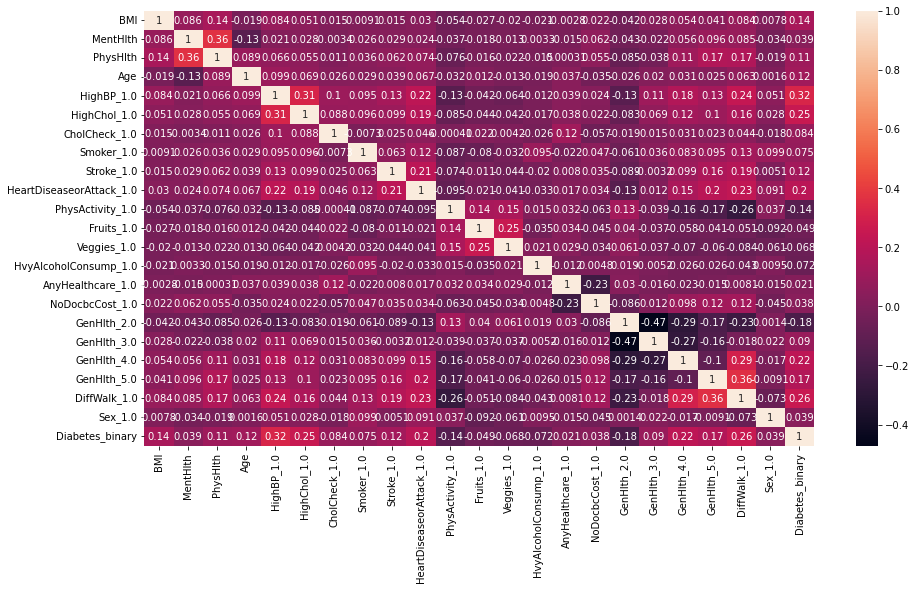

In [67]:
sns.heatmap(dfn.corr(),annot=True)
plt.show()

# The correlation of each independent variable with the target variable.

In [68]:
corr=dfn.corr()
corr

,BMI,MentHlth,PhysHlth,Age,HighBP_1.0,HighChol_1.0,CholCheck_1.0,Smoker_1.0,Stroke_1.0,HeartDiseaseorAttack_1.0,PhysActivity_1.0,Fruits_1.0,Veggies_1.0,HvyAlcoholConsump_1.0,AnyHealthcare_1.0,NoDocbcCost_1.0,GenHlth_2.0,GenHlth_3.0,GenHlth_4.0,GenHlth_5.0,DiffWalk_1.0,Sex_1.0,Diabetes_binary
BMI,1.000000,0.085561,0.142726,-0.018699,0.083644,0.051344,0.015093,0.009111,0.015140,0.029614,-0.054446,-0.027486,-0.019757,-0.020848,-0.002833,0.021584,-0.041737,0.027773,0.053718,0.040634,0.084382,0.007768,0.143348
MentHlth,0.085561,1.000000,0.362801,-0.128545,0.020925,0.027608,-0.003398,0.026458,0.028577,0.023720,-0.036693,-0.017623,-0.012762,0.003329,-0.014525,0.061665,-0.042569,-0.021802,0.055623,0.095779,0.084983,-0.034219,0.038745
PhysHlth,0.142726,0.362801,1.000000,0.089325,0.065597,0.054823,0.011021,0.035530,0.061740,0.073949,-0.076006,-0.015927,-0.021695,-0.014548,0.000315,0.055148,-0.085216,-0.037542,0.109836,0.174538,0.170810,-0.019425,0.108951
Age,-0.018699,-0.128545,0.089325,1.000000,0.098827,0.068629,0.025603,0.029087,0.039199,0.066953,-0.031620,0.012437,-0.012596,-0.019022,0.037300,-0.035481,-0.025947,0.019587,0.030922,0.024582,0.063453,0.001575,0.115928
HighBP_1.0,0.083644,0.020925,0.065597,0.098827,1.000000,0.312255,0.102453,0.095367,0.133790,0.216077,-0.133807,-0.042200,-0.064324,-0.012127,0.039307,0.023675,-0.129333,0.107725,0.178045,0.129923,0.235907,0.051104,0.321731
HighChol_1.0,0.051344,0.027608,0.054823,0.068629,0.312255,1.000000,0.087672,0.095536,0.098662,0.188292,-0.085075,-0.044214,-0.042474,-0.016692,0.038445,0.021613,-0.083470,0.068645,0.124494,0.100832,0.158469,0.028275,0.247234
CholCheck_1.0,0.015093,-0.003398,0.011021,0.025603,0.102453,0.087672,1.000000,-0.007318,0.025271,0.046462,-0.000408,0.022146,0.004182,-0.026222,0.116232,-0.057284,-0.019272,0.015172,0.030646,0.023446,0.043718,-0.018249,0.084391
Smoker_1.0,0.009111,0.026458,0.035530,0.029087,0.095367,0.095536,-0.007318,1.000000,0.063274,0.119790,-0.087025,-0.079928,-0.032377,0.094806,-0.022224,0.047058,-0.061306,0.036097,0.082866,0.094942,0.125307,0.099108,0.075333
Stroke_1.0,0.015140,0.028577,0.061740,0.039199,0.133790,0.098662,0.025271,0.063274,1.000000,0.212094,-0.073857,-0.011078,-0.043792,-0.019926,0.008049,0.034713,-0.089070,-0.003200,0.099133,0.155507,0.186471,0.005082,0.123286
HeartDiseaseorAttack_1.0,0.029614,0.023720,0.073949,0.066953,0.216077,0.188292,0.046462,0.119790,0.212094,1.000000,-0.094598,-0.020683,-0.040933,-0.033334,0.017361,0.033677,-0.133357,0.011963,0.153748,0.202396,0.226996,0.090723,0.204185


Ø	Age has a positive correlation with Diabetes_binary, HighBP, HighChol, HeartDiseaseorAttack, and PhysHlth. This suggests that as people get older, they are more likely to have these health conditions.
Ø	Diabetes is positively correlated with HighBP, HighChol, and BMI, which suggests that if someone has diabetes, there is a higher chance that they may also have high blood pressure, high cholesterol, and high BMI.
Ø	Physical activity and Fruits intake are negatively correlated with BMI, which suggests that if someone is physically active and consumes a good amount of fruits, they are likely to have lower BMI. This also suggests that people who engage in physical activity and eat a healthy diet are less likely to have these health conditions.
Ø	Smoking is positively correlated with stroke, which suggests that smokers are more likely to have a stroke.


In [69]:
a=corr.iloc[:22,22]
a

BMI                         0.143348
MentHlth                    0.038745
PhysHlth                    0.108951
Age                         0.115928
HighBP_1.0                  0.321731
HighChol_1.0                0.247234
CholCheck_1.0               0.084391
Smoker_1.0                  0.075333
Stroke_1.0                  0.123286
HeartDiseaseorAttack_1.0    0.204185
PhysActivity_1.0           -0.140392
Fruits_1.0                 -0.048787
Veggies_1.0                -0.067926
HvyAlcoholConsump_1.0      -0.071940
AnyHealthcare_1.0           0.020788
NoDocbcCost_1.0             0.038063
GenHlth_2.0                -0.182828
GenHlth_3.0                 0.089802
GenHlth_4.0                 0.217300
GenHlth_5.0                 0.174233
DiffWalk_1.0                0.255774
Sex_1.0                     0.039323
Name: Diabetes_binary, dtype: float64

In [70]:
a.max()

0.32173054608886875

In [71]:
a.min()

-0.18282843383301775

# Multicollinearity

In [72]:
x=dfn.drop('Diabetes_binary',axis=1)
y=dfn['Diabetes_binary']
xc=sm.add_constant(x)
xtrain,xtest,ytrain,ytest=train_test_split(xc,y,random_state=100,test_size=0.2)


In [73]:
xtrain.shape

(259497, 23)

In [74]:
ytrain.shape

(259497,)

In [75]:
df_independent.shape

(324372, 22)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324372 entries, 0 to 253679
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       324372 non-null  float64
 1   HighBP                324372 non-null  object 
 2   HighChol              324372 non-null  object 
 3   CholCheck             324372 non-null  object 
 4   BMI                   324372 non-null  float64
 5   Smoker                324372 non-null  object 
 6   Stroke                324372 non-null  object 
 7   HeartDiseaseorAttack  324372 non-null  object 
 8   PhysActivity          324372 non-null  object 
 9   Fruits                324372 non-null  object 
 10  Veggies               324372 non-null  object 
 11  HvyAlcoholConsump     324372 non-null  object 
 12  AnyHealthcare         324372 non-null  object 
 13  NoDocbcCost           324372 non-null  object 
 14  GenHlth               324372 non-null  object 
 15  

In [77]:
dfn.isnull().sum()

BMI                             0
MentHlth                        0
PhysHlth                        0
Age                             0
HighBP_1.0                  70692
HighChol_1.0                70692
CholCheck_1.0               70692
Smoker_1.0                  70692
Stroke_1.0                  70692
HeartDiseaseorAttack_1.0    70692
PhysActivity_1.0            70692
Fruits_1.0                  70692
Veggies_1.0                 70692
HvyAlcoholConsump_1.0       70692
AnyHealthcare_1.0           70692
NoDocbcCost_1.0             70692
GenHlth_2.0                 70692
GenHlth_3.0                 70692
GenHlth_4.0                 70692
GenHlth_5.0                 70692
DiffWalk_1.0                70692
Sex_1.0                     70692
Diabetes_binary             70692
dtype: int64

In [78]:
#sm.OLS(ytrain,xtrain).fit()

In [79]:
df_target.shape

(253680,)

In [80]:
dff=pd.concat([df_num,df_cat],axis=1)

In [81]:
df_dependent=df['Diabetes_binary']

In [82]:
x=dff
y=df_dependent
xc=sm.add_constant(x)
xtrain,xtest,ytrain,ytest=train_test_split(xc,y,random_state=100,test_size=0.2)
ols_model=sm.OLS(ytrain,xtrain).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Diabetes_binary   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     2639.
Date:                Thu, 25 May 2023   Prob (F-statistic):               0.00
Time:                        23:51:44   Log-Likelihood:            -1.1239e+05
No. Observations:              259497   AIC:                         2.248e+05
Df Residuals:                  259474   BIC:                         2.251e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -1.4389      0.013   -107.705      0.000      -1.465      -1.413
BMI                          0.3905      0.004    107.961      0.000       0.383       0.398
MentHlth                     0.0021      0.001      4.113      0.000       0.001       0.003
PhysHlth                     0.0178      0.000     36.224      0.000       0.017       0.019
Age                          0.0199      0.000     74.671      0.000       0.019       0.020
HighBP_1.0                   0.0731      0.002     43.581      0.000       0.070       0.076
HighChol_1.0                 0.0538      0.002     33.814      0.000       0.051       0.057
CholCheck_1.0                0.0555      0.004     13.086      0.000       0.047       0.064
Smoker_1.0                  -0.0037      0.002     -2.434      0.015      -0.007      -0.001
Stroke_1.0                   0.0257      0.004      7.307      0.000       0.019       0.033
HeartDiseaseorAttack_1.0     0.0472      0.002     19.066      0.000       0.042       0.052
PhysActivity_1.0            -0.0009      0.002     -0.530      0.596      -0.004       0.003
Fruits_1.0                  -0.0049      0.002     -3.106      0.002      -0.008      -0.002
Veggies_1.0                 -0.0075      0.002     -3.909      0.000      -0.011      -0.004
HvyAlcoholConsump_1.0       -0.0569      0.003    -16.715      0.000      -0.064      -0.050
AnyHealthcare_1.0           -0.0029      0.004     -0.803      0.422      -0.010       0.004
NoDocbcCost_1.0             -0.0035      0.003     -1.295      0.195      -0.009       0.002
GenHlth_2.0                  0.0102      0.002      4.400      0.000       0.006       0.015
GenHlth_3.0                  0.0778      0.002     31.876      0.000       0.073       0.083
GenHlth_4.0                  0.1315      0.003     42.888      0.000       0.125       0.137
GenHlth_5.0                  0.1350      0.004     32.209      0.000       0.127       0.143
DiffWalk_1.0                 0.0097      0.002      4.369      0.000       0.005       0.014
Sex_1.0                      0.0181      0.002     11.934      0.000       0.015       0.021
==============================================================================
Omnibus:                    29089.284   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39941.755
Skew:                           0.957   Prob(JB):                         0.00
Kurtosis:                       2.835   Cond. No.                         182.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We donot have multicollinearity in our dataset.

# Train Test Split

In [83]:
xtrain,xtest,ytrain,ytest=train_test_split(dff,df_dependent,random_state=100,test_size=0.2)

In [84]:
print('xtrain : ' ,xtrain.shape)
print('xtest : ' ,xtest.shape)
print('ytrain : ' ,ytrain.shape)
print('ytest : ' ,ytest.shape)

xtrain :  (259497, 22)
xtest :  (64875, 22)
ytrain :  (259497,)
ytest :  (64875,)


In [85]:
def confusion(model):
    y_pred=model.predict()

# Logistic Regression(Full Model)

In [86]:
full_logit_model=sm.Logit(ytrain,xtrain).fit()
full_logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.462170
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Diabetes_binary   No. Observations:               259497
Model:                          Logit   Df Residuals:                   259475
Method:                           MLE   Df Model:                           21
Date:                Thu, 25 May 2023   Pseudo R-squ.:                  0.1182
Time:                        23:51:47   Log-Likelihood:            -1.1993e+05
converged:                       True   LL-Null:                   -1.3601e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
BMI                         -0.4576      0.011    -41.071      0.000      -0.479      -0.436
MentHlth                     0.0025      0.003      0.755      0.450      -0.004       0.009
PhysHlth                     0.1207      0.003     39.506      0.000       0.115       0.127
Age                          0.0964      0.002     50.196      0.000       0.093       0.100
HighBP_1.0                   0.7166      0.012     62.045      0.000       0.694       0.739
HighChol_1.0                 0.4254      0.011     39.128      0.000       0.404       0.447
CholCheck_1.0               -0.7373      0.028    -26.292      0.000      -0.792      -0.682
Smoker_1.0                  -0.1002      0.010     -9.559      0.000      -0.121      -0.080
Stroke_1.0                   0.0452      0.021      2.187      0.029       0.005       0.086
HeartDiseaseorAttack_1.0     0.2023      0.015     13.846      0.000       0.174       0.231
PhysActivity_1.0            -0.2151      0.011    -18.985      0.000      -0.237      -0.193
Fruits_1.0                  -0.1445      0.011    -13.362      0.000      -0.166      -0.123
Veggies_1.0                 -0.1962      0.012    -15.795      0.000      -0.220      -0.172
HvyAlcoholConsump_1.0       -0.7105      0.029    -24.102      0.000      -0.768      -0.653
AnyHealthcare_1.0           -0.7479      0.023    -33.113      0.000      -0.792      -0.704
NoDocbcCost_1.0             -0.2118      0.018    -11.659      0.000      -0.247      -0.176
GenHlth_2.0                  0.0475      0.020      2.349      0.019       0.008       0.087
GenHlth_3.0                  0.6376      0.020     32.306      0.000       0.599       0.676
GenHlth_4.0                  0.8432      0.022     37.809      0.000       0.800       0.887
GenHlth_5.0                  0.7477      0.028     26.968      0.000       0.693       0.802
DiffWalk_1.0                 0.1392      0.013     10.348      0.000       0.113       0.166
Sex_1.0                      0.1036      0.011      9.846      0.000       0.083       0.124
============================================================================================
"""

In [87]:
full_logit_model.aic

239907.66224988128

In [88]:
y_proba=full_logit_model.predict(xtest)
y_pred=[ 0 if i<0.5 else 1 for i in y_proba]

In [89]:
accuracy=accuracy_score(ytest,y_pred)
accuracy

0.780485549132948

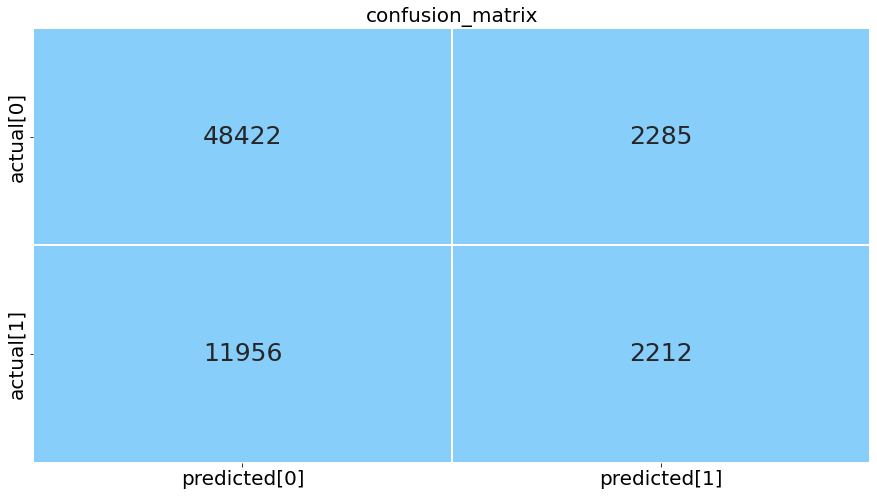

In [90]:
cm=confusion_matrix(ytest,y_pred)
cm=pd.DataFrame(cm,index=['actual[0]','actual[1]'],columns=['predicted[0]','predicted[1]'])
sns.heatmap(cm,annot=True,fmt='d',cmap = ListedColormap(['lightskyblue']),cbar=False,linewidths = 0.1, annot_kws = {'size':25})
plt.title('confusion_matrix',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

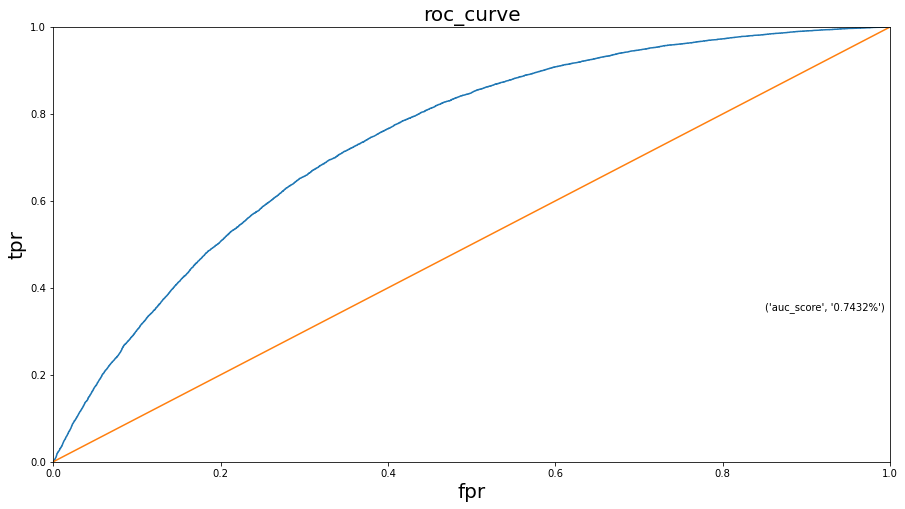

In [91]:
fpr,tpr,threshold=roc_curve(ytest,y_proba)
plt.plot(fpr,tpr)
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot([0,1],[0,1])
plt.title('roc_curve',fontsize=20)
plt.xlabel('fpr',fontsize=20)
plt.ylabel('tpr',fontsize=20)
plt.text(x=0.85,y=0.35,s=('auc_score',str(round(roc_auc_score(ytest,y_proba),4))+'%'))
plt.show()


# Decision Tree

# Tuned The Hyperparameters using GridsearchCV(Decision Tree)

In [92]:
tuned_paramaters = {'criterion': ['entropy', 'gini']}
dt=DecisionTreeClassifier(random_state=10)
grid=GridSearchCV(estimator=dt,param_grid=tuned_paramaters,cv=3)
grid_model=grid.fit(xtrain,ytrain)
grid_model.best_params_

{'criterion': 'entropy'}

In [93]:
decision_tree=DecisionTreeClassifier(criterion='entropy',random_state=10 )
dt_model=decision_tree.fit(xtrain,ytrain)

 check overfitting

In [94]:
train_pred=dt_model.predict(xtrain)

In [95]:
report=classification_report(ytrain,train_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98    202973
         1.0       0.97      0.89      0.93     56524

    accuracy                           0.97    259497
   macro avg       0.97      0.94      0.96    259497
weighted avg       0.97      0.97      0.97    259497



In [96]:
test_pred=dt_model.predict(xtest)
report=classification_report(ytest,test_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89     50707
         1.0       0.59      0.63      0.61     14168

    accuracy                           0.83     64875
   macro avg       0.74      0.76      0.75     64875
weighted avg       0.83      0.83      0.83     64875



As there is difference between train accuracy and test accuracy ,we can say that decision tree model is overfit. 

# Random Forest

# Tuned The Hyperparameters using GridsearchCV

In [97]:
tuned_para={'criterion': ['entropy', 'gini']}
rf_classification=RandomForestClassifier(random_state=10)
rf=GridSearchCV(estimator=rf_classification,param_grid=tuned_para,cv=3)
rf_model=rf.fit(xtrain,ytrain)
rf_model.best_params_

{'criterion': 'gini'}

In [98]:
df1['Education'].value_counts()

6.000000    26020
5.000000    20030
4.000000    19473
3.000000     3447
2.000000     1647
1.000000       75
Name: Education, dtype: int64

In [99]:
random_forest=RandomForestClassifier(criterion='gini',random_state=10)
random_model=random_forest.fit(xtrain,ytrain)


In [100]:
#overfitting

In [101]:
train_pred=random_model.predict(xtrain)
report=classification_report(ytrain,train_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98    202973
         1.0       0.96      0.90      0.93     56524

    accuracy                           0.97    259497
   macro avg       0.97      0.95      0.96    259497
weighted avg       0.97      0.97      0.97    259497



In [102]:
test_pred=random_model.predict(xtest)
report=classification_report(ytest,test_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92     50707
         1.0       0.73      0.62      0.67     14168

    accuracy                           0.87     64875
   macro avg       0.81      0.78      0.79     64875
weighted avg       0.86      0.87      0.86     64875



MULTICOLLINEARITY

In [103]:
dfn.head()

,BMI,MentHlth,PhysHlth,Age,HighBP_1.0,HighChol_1.0,CholCheck_1.0,Smoker_1.0,Stroke_1.0,HeartDiseaseorAttack_1.0,PhysActivity_1.0,Fruits_1.0,Veggies_1.0,HvyAlcoholConsump_1.0,AnyHealthcare_1.0,NoDocbcCost_1.0,GenHlth_2.0,GenHlth_3.0,GenHlth_4.0,GenHlth_5.0,DiffWalk_1.0,Sex_1.0,Diabetes_binary
0,-0.353641,0.847551,2.400765,-1.374997,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
1,-0.353641,-0.563614,-0.648902,1.274064,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
2,-0.353641,-0.563614,1.111825,1.605197,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
3,-0.004927,-0.563614,0.315488,0.942931,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
4,0.160194,-0.563614,-0.648902,-0.050466,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [104]:
dfn.shape

(324372, 23)

In [105]:
dfn.isnull().sum()

BMI                             0
MentHlth                        0
PhysHlth                        0
Age                             0
HighBP_1.0                  70692
HighChol_1.0                70692
CholCheck_1.0               70692
Smoker_1.0                  70692
Stroke_1.0                  70692
HeartDiseaseorAttack_1.0    70692
PhysActivity_1.0            70692
Fruits_1.0                  70692
Veggies_1.0                 70692
HvyAlcoholConsump_1.0       70692
AnyHealthcare_1.0           70692
NoDocbcCost_1.0             70692
GenHlth_2.0                 70692
GenHlth_3.0                 70692
GenHlth_4.0                 70692
GenHlth_5.0                 70692
DiffWalk_1.0                70692
Sex_1.0                     70692
Diabetes_binary             70692
dtype: int64

In [106]:
dfn=dfn.dropna()

In [107]:
dfn.isnull().sum()

BMI                         0
MentHlth                    0
PhysHlth                    0
Age                         0
HighBP_1.0                  0
HighChol_1.0                0
CholCheck_1.0               0
Smoker_1.0                  0
Stroke_1.0                  0
HeartDiseaseorAttack_1.0    0
PhysActivity_1.0            0
Fruits_1.0                  0
Veggies_1.0                 0
HvyAlcoholConsump_1.0       0
AnyHealthcare_1.0           0
NoDocbcCost_1.0             0
GenHlth_2.0                 0
GenHlth_3.0                 0
GenHlth_4.0                 0
GenHlth_5.0                 0
DiffWalk_1.0                0
Sex_1.0                     0
Diabetes_binary             0
dtype: int64

In [108]:
dfn.shape

(253680, 23)

In [109]:
x=dfn.drop('Diabetes_binary',axis=1)
y=dfn['Diabetes_binary']
xc=sm.add_constant(x)
xtrain,xtest,ytrain,ytest=train_test_split(xc,y,random_state=10,test_size=0.2)

In [110]:
model=sm.OLS(ytrain,xtrain).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Diabetes_binary   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     2601.
Date:                Thu, 25 May 2023   Prob (F-statistic):               0.00
Time:                        23:56:03   Log-Likelihood:                -90056.
No. Observations:              202944   AIC:                         1.802e+05
Df Residuals:                  202921   BIC:                         1.804e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.0763      0.007    -11.622      0.000      -0.089      -0.063
BMI                          0.0398      0.001     47.233      0.000       0.038       0.041
MentHlth                     0.0005      0.001      0.578      0.563      -0.001       0.002
PhysHlth                     0.0062      0.001      6.695      0.000       0.004       0.008
Age                          0.0299      0.001     34.496      0.000       0.028       0.032
HighBP_1.0                   0.1426      0.002     76.102      0.000       0.139       0.146
HighChol_1.0                 0.0929      0.002     51.446      0.000       0.089       0.096
CholCheck_1.0                0.0829      0.005     17.590      0.000       0.074       0.092
Smoker_1.0                  -0.0029      0.002     -1.679      0.093      -0.006       0.000
Stroke_1.0                   0.0384      0.004      9.266      0.000       0.030       0.047
HeartDiseaseorAttack_1.0     0.0802      0.003     27.623      0.000       0.074       0.086
PhysActivity_1.0            -0.0188      0.002     -9.238      0.000      -0.023      -0.015
Fruits_1.0                  -0.0037      0.002     -2.061      0.039      -0.007      -0.000
Veggies_1.0                 -0.0084      0.002     -3.801      0.000      -0.013      -0.004
HvyAlcoholConsump_1.0       -0.0925      0.004    -24.250      0.000      -0.100      -0.085
AnyHealthcare_1.0            0.0176      0.004      4.304      0.000       0.010       0.026
NoDocbcCost_1.0             -0.0156      0.003     -4.985      0.000      -0.022      -0.009
GenHlth_2.0                  0.0346      0.003     13.413      0.000       0.030       0.040
GenHlth_3.0                  0.1419      0.003     52.208      0.000       0.137       0.147
GenHlth_4.0                  0.2430      0.003     70.775      0.000       0.236       0.250
GenHlth_5.0                  0.2659      0.005     56.303      0.000       0.257       0.275
DiffWalk_1.0                 0.0688      0.003     27.007      0.000       0.064       0.074
Sex_1.0                      0.0249      0.002     14.458      0.000       0.022       0.028
==============================================================================
Omnibus:                    17287.599   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21648.439
Skew:                           0.791   Prob(JB):                         0.00
Kurtosis:                       2.757   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Train Test Split

In [111]:
independent=dfn.drop('Diabetes_binary',axis=1)
dependent=dfn['Diabetes_binary']
xtrain,xtest,ytrain,ytest=train_test_split(independent,dependent,random_state=100,test_size=0.2)

In [112]:
print('xtrain : ' ,xtrain.shape)
print('xtest : ' ,xtest.shape)
print('ytrain : ' ,ytrain.shape)
print('ytest : ' ,ytest.shape)

xtrain :  (202944, 22)
xtest :  (50736, 22)
ytrain :  (202944,)
ytest :  (50736,)


# Logistic Regression(Full Model)

In [113]:
scaled_full_logit_model=sm.Logit(ytrain,xtrain).fit()
scaled_full_logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.450234
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Diabetes_binary   No. Observations:               202944
Model:                          Logit   Df Residuals:                   202922
Method:                           MLE   Df Model:                           21
Date:                Thu, 25 May 2023   Pseudo R-squ.:                  0.1828
Time:                        23:56:06   Log-Likelihood:                -91372.
converged:                       True   LL-Null:                   -1.1181e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
BMI                          0.2650      0.006     45.957      0.000       0.254       0.276
MentHlth                    -0.0028      0.006     -0.442      0.659      -0.015       0.009
PhysHlth                     0.0471      0.006      7.626      0.000       0.035       0.059
Age                          0.2399      0.006     37.984      0.000       0.228       0.252
HighBP_1.0                   0.9592      0.013     74.246      0.000       0.934       0.984
HighChol_1.0                 0.5963      0.012     48.488      0.000       0.572       0.620
CholCheck_1.0               -1.1018      0.025    -44.132      0.000      -1.151      -1.053
Smoker_1.0                  -0.1037      0.012     -8.662      0.000      -0.127      -0.080
Stroke_1.0                   0.1882      0.025      7.644      0.000       0.140       0.236
HeartDiseaseorAttack_1.0     0.3975      0.017     23.209      0.000       0.364       0.431
PhysActivity_1.0            -0.3269      0.013    -25.560      0.000      -0.352      -0.302
Fruits_1.0                  -0.1323      0.012    -10.748      0.000      -0.156      -0.108
Veggies_1.0                 -0.2994      0.014    -21.453      0.000      -0.327      -0.272
HvyAlcoholConsump_1.0       -0.9964      0.034    -28.969      0.000      -1.064      -0.929
AnyHealthcare_1.0           -0.9917      0.023    -43.899      0.000      -1.036      -0.947
NoDocbcCost_1.0             -0.3963      0.021    -19.205      0.000      -0.437      -0.356
GenHlth_2.0                 -0.0750      0.021     -3.543      0.000      -0.116      -0.033
GenHlth_3.0                  0.6967      0.020     34.298      0.000       0.657       0.737
GenHlth_4.0                  1.1184      0.023     47.855      0.000       1.073       1.164
GenHlth_5.0                  1.1959      0.030     39.744      0.000       1.137       1.255
DiffWalk_1.0                 0.2815      0.015     18.349      0.000       0.251       0.312
Sex_1.0                      0.0564      0.012      4.753      0.000       0.033       0.080
============================================================================================
"""

In [114]:
scaled_full_logit_model.aic

182788.4965149914

In [115]:
y_proba=scaled_full_logit_model.predict(xtest)
y_pred=[ 0 if i<0.5 else 1 for i in y_proba]

In [116]:
accuracy=accuracy_score(ytest,y_pred)
accuracy

0.7846302428256071

In [117]:
tuned_paramaters = {'criterion': ['entropy', 'gini']}
dt=DecisionTreeClassifier(random_state=10)
grid=GridSearchCV(estimator=dt,param_grid=tuned_paramaters,cv=3)
grid_model=grid.fit(xtrain,ytrain)
grid_model.best_params_

{'criterion': 'entropy'}

In [118]:
decision_tree=DecisionTreeClassifier(criterion='entropy',random_state=10 )
dt_model=decision_tree.fit(xtrain,ytrain)

In [119]:
train_pred=dt_model.predict(xtrain)

In [120]:
report=classification_report(ytrain,train_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98    154260
         1.0       0.99      0.89      0.94     48684

    accuracy                           0.97    202944
   macro avg       0.98      0.94      0.96    202944
weighted avg       0.97      0.97      0.97    202944



In [121]:
test_pred=dt_model.predict(xtest)
report=classification_report(ytest,test_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.82      0.83      0.82     38456
         1.0       0.44      0.41      0.43     12280

    accuracy                           0.73     50736
   macro avg       0.63      0.62      0.63     50736
weighted avg       0.73      0.73      0.73     50736



In [122]:
tuned_para={'criterion': ['entropy', 'gini']}
rf_classification=RandomForestClassifier(random_state=10)
rf=GridSearchCV(estimator=rf_classification,param_grid=tuned_para,cv=3)
rf_model=rf.fit(xtrain,ytrain)
rf_model.best_params_

{'criterion': 'entropy'}

In [123]:
random_forest=RandomForestClassifier(criterion='entropy',random_state=10)
random_model=random_forest.fit(xtrain,ytrain)


In [124]:
train_pred=random_model.predict(xtrain)
report=classification_report(ytrain,train_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98    154260
         1.0       0.97      0.91      0.94     48684

    accuracy                           0.97    202944
   macro avg       0.97      0.95      0.96    202944
weighted avg       0.97      0.97      0.97    202944



In [125]:
test_pred=random_model.predict(xtest)
report=classification_report(ytest,test_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86     38456
         1.0       0.56      0.41      0.47     12280

    accuracy                           0.78     50736
   macro avg       0.70      0.65      0.67     50736
weighted avg       0.76      0.78      0.77     50736



In [137]:
def find(ytest,ypred,modelname):
    print('For Model',modelname,':')
    print('accuracy score is ',accuracy_score(ytest,ypred))
    print('recall score is ',recall_score(ytest,ypred))
    print('precision score is ',precision_score(ytest,ypred))
    

# Logistic

In [134]:
logistic=LogisticRegression()
logistic.fit(xtrain,ytrain)


LogisticRegression()

In [135]:
logistic_test_pred=logistic.predict(xtest)

In [138]:
find(ytest,logistic_test_pred,logistic)

For Model LogisticRegression() :
accuracy score is  0.7933814254178493
recall score is  0.38355048859934854
precision score is  0.6178669815033452


# GAUSSIAN

In [140]:
gaussian_model=GaussianNB()
gaussian_model.fit(xtrain,ytrain)
gaussian_test_predict=gaussian_model.predict(xtest)
confusion_matrix(ytest,test_predict)

array([[30555,  7901],
       [ 5041,  7239]], dtype=int64)

In [141]:
print(classification_report(ytest,test_predict))

              precision    recall  f1-score   support

         0.0       0.86      0.79      0.83     38456
         1.0       0.48      0.59      0.53     12280

    accuracy                           0.74     50736
   macro avg       0.67      0.69      0.68     50736
weighted avg       0.77      0.74      0.75     50736



In [142]:
find(ytest,gaussian_test_predict,gaussian_model)

For Model GaussianNB() :
accuracy score is  0.744914853358562
recall score is  0.5894951140065147
precision score is  0.47813738441215325


# knn

In [130]:
knn=KNeighborsClassifier(n_neighbors=5,weights='distance')
knn.fit(xtrain,ytrain)

KNeighborsClassifier(weights='distance')

In [131]:
knn_test_predict=knn.predict(xtest)
print(classification_report(ytest,knn_test_predict))

              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85     38456
         1.0       0.52      0.41      0.46     12280

    accuracy                           0.77     50736
   macro avg       0.67      0.65      0.66     50736
weighted avg       0.75      0.77      0.76     50736



In [139]:
find(ytest,knn_test_predict,knn)

For Model KNeighborsClassifier(weights='distance') :
accuracy score is  0.7659058656575213
recall score is  0.41156351791530943
precision score is  0.5207624935600206
